# Modèles Ising

## Importation des libraries et du Drive

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

file_dir = "./data/"

def read_t(t,root="./", str_check=False):
  if not str_check :
    data = pickle.load(open(root+'Ising2DFM_reSample_L40_T=%.2f.pkl'%t,'rb'))
  else :
    data = pickle.load(open(root+f'Ising2DFM_reSample_L40_T={t}.pkl','rb'))
  return np.unpackbits(data).astype(int).reshape(-1,1600)

## Première Analyse des données
### Analyse du fichier de données totale

In [2]:
data_all = read_t("All", file_dir, True)
data_label = pickle.load(open(file_dir+f'Ising2DFM_reSample_L40_T=All_labels.pkl','rb'))

nom_temp = np.arange(0.25, 4.25, 0.25)

tot_data = np.empty((0,40,40))
tot_label = np.empty(0)

for T in nom_temp :
  tmp = read_t(T, file_dir)
  tot_data = np.concatenate((tot_data, tmp.reshape(tmp.shape[0], 40, 40)))
  tot_label = np.concatenate((tot_label, T*np.ones(tmp.shape[0])))

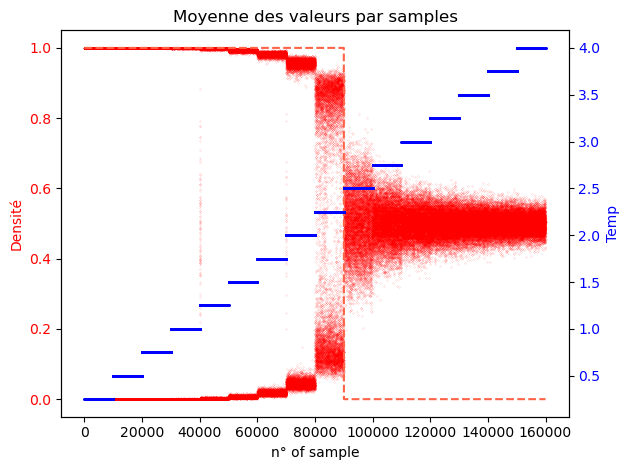

In [13]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('n° of sample')
ax1.set_ylabel('Densité', color="red")
ax1.scatter(range(160000), tot_data.reshape(tot_data.shape[0], 40*40).mean(axis=1), s=.005, label="Mean value of samples", c="r")
ax1.plot(range(160000), data_label, "--", label="Labels", c='tomato')
ax1.tick_params(axis='y', labelcolor="r")

ax2 = ax1.twinx()

ax2.set_ylabel('Temp', color="b")
ax2.scatter(range(160000), tot_label, s=.1, label="Temps", c="b")
ax2.tick_params(axis='y', labelcolor="b")

ax1.set_title("Moyenne des valeurs par samples")

fig.tight_layout()
plt.savefig("mean_value.png", dpi=300)
plt.show()

In [3]:
tot_data_sym = 2*np.abs(tot_data.reshape(tot_data.shape[0], 40*40).mean(axis=1) - 0.5)

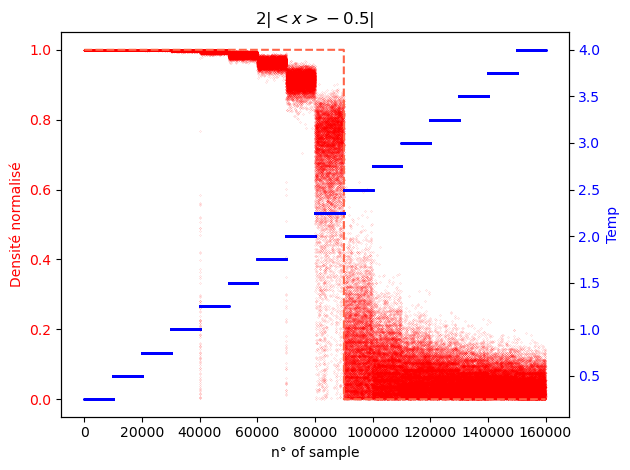

In [4]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('n° of sample')
ax1.set_ylabel('Densité normalisé', color="red")
ax1.scatter(range(160000), tot_data_sym, s=.005, label="Mean value of samples", c="r")
ax1.plot(range(160000), data_label, "--", label="Labels", c='tomato')
ax1.tick_params(axis='y', labelcolor="r")

ax2 = ax1.twinx()

ax2.set_ylabel('Temp', color="b")
ax2.scatter(range(160000), tot_label, s=.1, label="Temps", c="b")
ax2.tick_params(axis='y', labelcolor="b")

ax1.set_title(r'$2 |<x> - 0.5|$')

fig.tight_layout()
plt.show()

## Modèle naïf
### Linear Regression

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

flattened_data = tot_data.reshape(tot_data.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(flattened_data, tot_label, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [6]:
predictions = linear_model.predict(X_test)
mse = mean_squared_error(y_test,predictions)
print("MSE:", mse)

MSE: 1.3398657822606181


### Linear Regression sur la moyenne de Spin Up

In [7]:
tot_data_sym_dim = np.c_[tot_data_sym.reshape(-1, 1), (tot_data_sym.reshape(-1, 1))**2, (tot_data_sym.reshape(-1, 1))**3, (tot_data_sym.reshape(-1, 1))**4]
X_train, X_test, y_train, y_test = train_test_split(tot_data_sym_dim, tot_label, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [8]:
predictions = linear_model.predict(X_test)
mse = mean_squared_error(y_test,predictions)

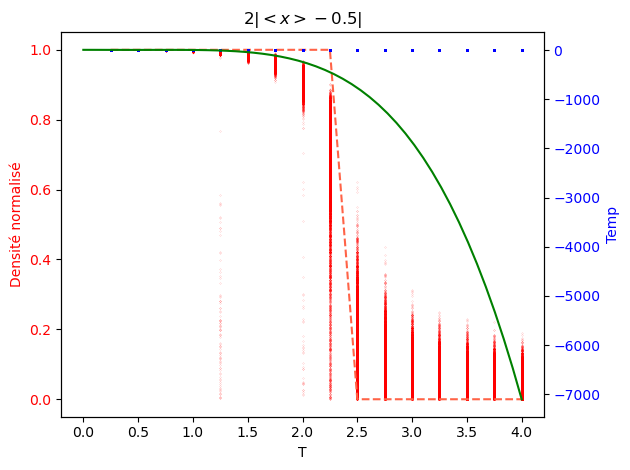

In [9]:
xnew = np.linspace(0, 4, 50)
xnew_dim = np.c_[xnew.reshape(-1, 1), (xnew.reshape(-1, 1))**2, (xnew.reshape(-1, 1))**3, (xnew.reshape(-1, 1))**4]

ynew = linear_model.predict(xnew_dim)

fig, ax1 = plt.subplots()

ax1.set_xlabel('T')
ax1.set_ylabel('Densité normalisé', color="red")
ax1.scatter(tot_label, tot_data_sym, s=.005, label="Mean value of samples", c="r")
ax1.plot(tot_label, data_label, "--", label="Labels", c='tomato')
ax1.tick_params(axis='y', labelcolor="r")

ax2 = ax1.twinx()

ax2.set_ylabel('Temp', color="b")
ax2.scatter(tot_label, tot_label, s=.1, label="Temps", c="b")
ax2.plot(xnew, ynew, c='g')
ax2.tick_params(axis='y', labelcolor="b")

ax1.set_title(r'$2 |<x> - 0.5|$')

fig.tight_layout()
plt.show()

## CNN
### Preprocessing

In [11]:
mean_val = tot_data.reshape(tot_data.shape[0], 40*40).mean(axis=1)
tot_data = tot_data.astype(np.uint8)

tot_data[mean_val > 0.5] = np.invert(tot_data[mean_val > 0.5])//255
tot_data.shape

(160000, 40, 40)

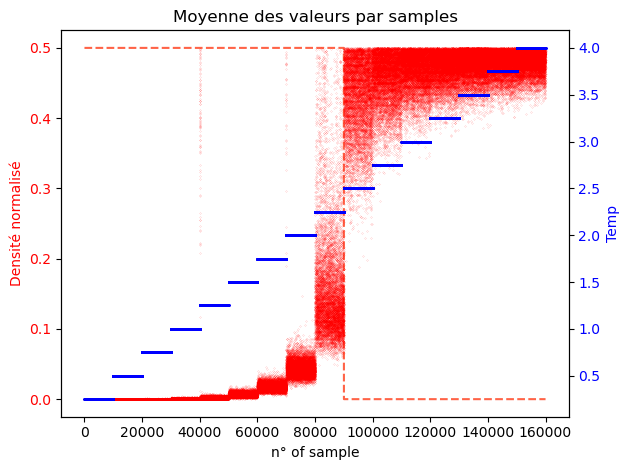

In [26]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('n° of sample')
ax1.set_ylabel('Densité normalisé', color="red")
ax1.scatter(range(tot_data.shape[0]), tot_data.reshape(tot_data.shape[0], 40*40).mean(axis=1), s=.005, label="Mean value of samples", c="r", zorder = 2)
ax1.plot(range(160000), data_label/2, "--", label="Labels", c='tomato', zorder = 1)
ax1.tick_params(axis='y', labelcolor="r")

ax2 = ax1.twinx()

ax2.set_ylabel('Temp', color="b")
ax2.scatter(range(160000), tot_label, s=.1, label="Temps", c="b", zorder = -1)
ax2.tick_params(axis='y', labelcolor="b")

ax1.set_title(r'Moyenne des valeurs par samples')

fig.tight_layout()
plt.savefig("sym_data.png", dpi=300)
plt.show()

### Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, ReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, Accuracy, AUC
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

tot_data_cnn = tot_data.reshape(tot_data.shape[0], 40, 40, 1)

X_train, X_test, y_train, y_test = train_test_split(tot_data_cnn, data_label, test_size=0.2, random_state=42)

model = Sequential()
model.add(Conv2D(16, (5, 5), input_shape=(40, 40, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), AUC()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

### Model training

In [12]:
callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks = [callback])

Epoch 1/30


2023-12-02 11:40:10.203698: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8800
2023-12-02 11:40:11.518240: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f0f647a2930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-02 11:40:11.518259: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2023-12-02 11:40:11.521425: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-02 11:40:11.586626: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


800/800 [==============================] - 6s 4ms/step - loss: 0.0187 - accuracy: 0.9933 - precision: 0.9968 - recall: 0.9913 - auc: 0.9996 - val_loss: 0.0085 - val_accuracy: 0.9973 - val_precision: 0.9999 - val_recall: 0.9953 - val_auc: 0.9997
Epoch 2/30
800/800 [==============================] - 3s 4ms/step - loss: 0.0075 - accuracy: 0.9974 - precision: 0.9983 - recall: 0.9971 - auc: 0.9999 - val_loss: 0.0085 - val_accuracy: 0.9974 - val_precision: 1.0000 - val_recall: 0.9954 - val_auc: 0.9996
Epoch 3/30
800/800 [==============================] - 3s 4ms/step - loss: 0.0065 - accuracy: 0.9978 - precision: 0.9986 - recall: 0.9976 - auc: 0.9999 - val_loss: 0.0064 - val_accuracy: 0.9980 - val_precision: 0.9999 - val_recall: 0.9965 - val_auc: 0.9998
Epoch 4/30
800/800 [==============================] - 3s 4ms/step - loss: 0.0054 - accuracy: 0.9981 - precision: 0.9987 - recall: 0.9980 - auc: 0.9999 - val_loss: 0.0055 - val_accuracy: 0.9984 - val_precision: 1.0000 - val_recall: 0.9972 - val

### Model evaluation

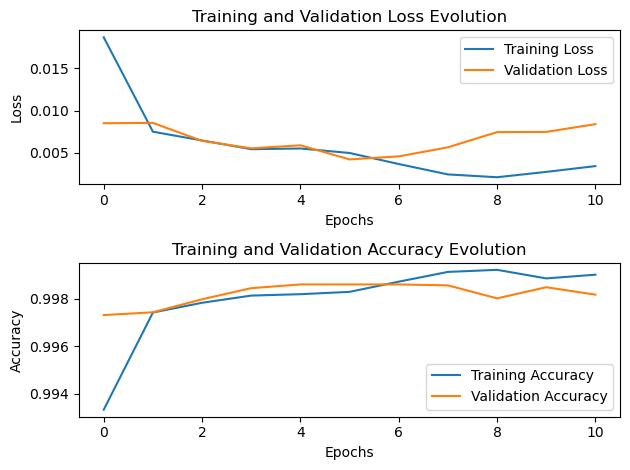

In [13]:
plt.subplot(211)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Evolution')

plt.subplot(212)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Evolution')

plt.tight_layout()
plt.show()

In [14]:
test_loss, test_accuracy, test_precision, test_recall, test_auc = model.evaluate(X_test, y_test)
print('test loss', test_loss)
print('test accuracy', test_accuracy)
print('test precision', test_precision)
print('test recall', test_recall)
print('test auc', test_auc)

1000/1000 [==============================] - 2s 1ms/step - loss: 0.0085 - accuracy: 0.9981 - precision: 0.9987 - recall: 0.9979 - auc: 0.9995
test loss 0.008517734706401825
test accuracy 0.9980937242507935
test precision 0.9987081289291382
test recall 0.9978674650192261
test auc 0.9995262622833252


1000/1000 [==============================] - 1s 780us/step


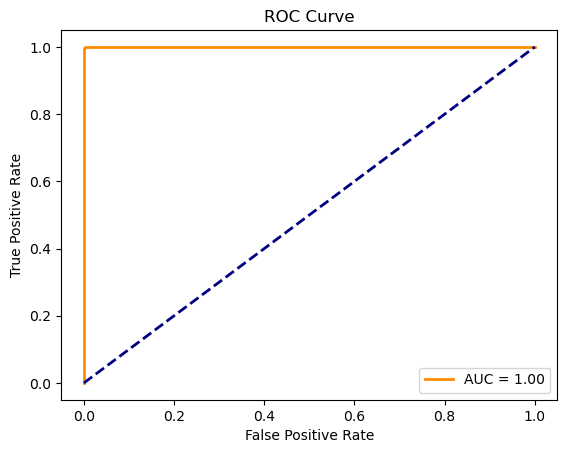

In [15]:
y_pred = model.predict(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

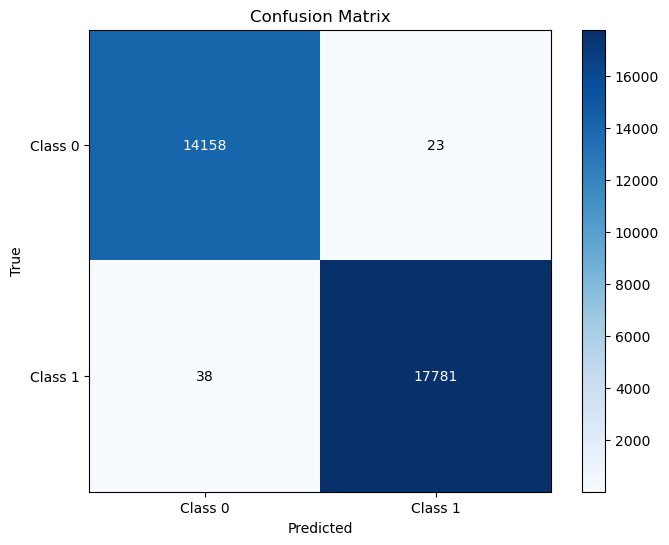

In [16]:
y_pred.reshape(32000,)

y_pred_binary = (y_pred > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

# Display the values inside the heatmap
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.show()

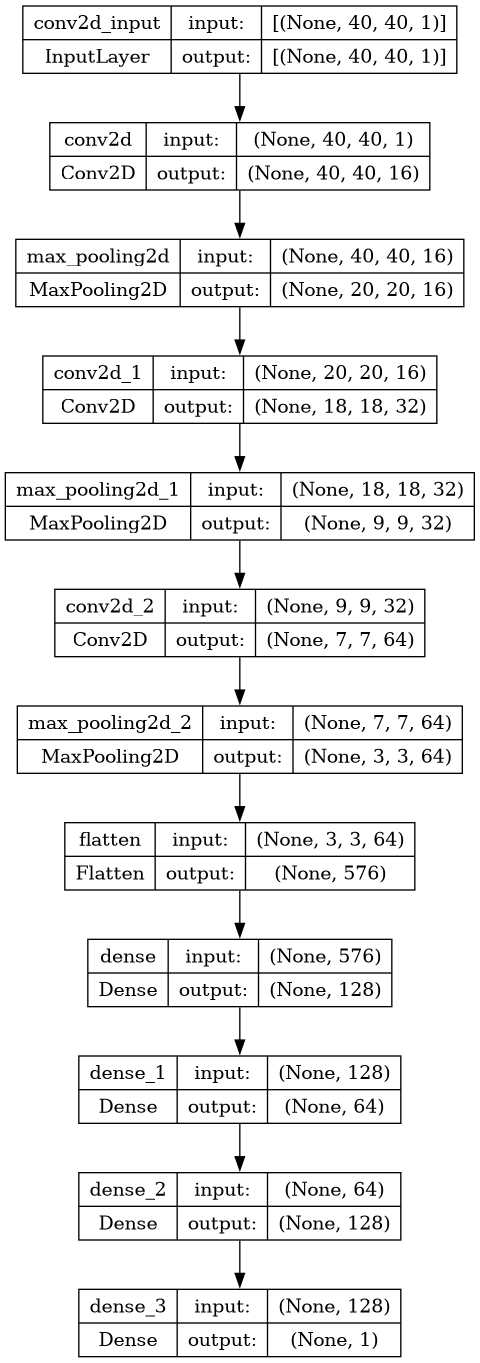

In [17]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)